In [ ]:
# import json
import numpy as np
import json
import matplotlib.pyplot as plt

file = open('./AF-Q9H0K1-F1-predicted_aligned_error_v4.json', 'r')
pae = json.load(file)
pae_array = np.array(pae[0]['predicted_aligned_error'], dtype=float)


PAE配列の形状: (926, 926)


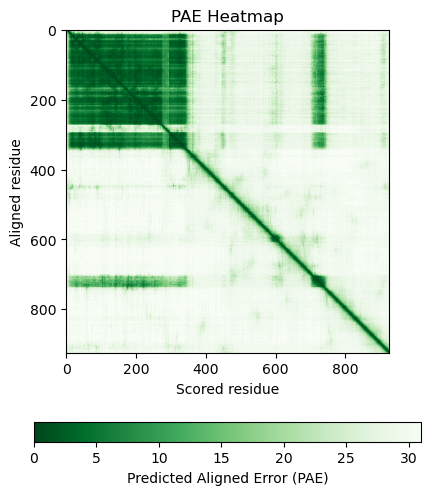

In [ ]:
# 配列の形状を確認
print(f"PAE配列の形状: {pae_array.shape}")

# ヒートマップを作成
plt.figure(figsize=(5, 6))
plt.imshow(pae_array, cmap='Greens_r', interpolation='nearest')
plt.colorbar(label='Predicted Aligned Error (PAE)', orientation='horizontal')
plt.title('PAE Heatmap')
plt.xlabel('Scored residue')
plt.ylabel('Aligned residue')
plt.show()


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from pymol import cmd
import json

file = open('./AF-Q9H0K1-F1-predicted_aligned_error_v4.json', 'r')
pae = json.load(file)
pae_array = np.array(pae[0]['predicted_aligned_error'], dtype=float)

# PyMOLセッションの開始
cmd.reinitialize()

# PAEデータを色付けするためのカスタムカラーマップ
cmap = plt.get_cmap('Greens_r')
norm = plt.Normalize(vmin=np.min(pae_array), vmax=np.max(pae_array))
color_values = cmap(norm(pae_array))

# PyMOLでヒートマップを表示
for i in range(pae_array.shape[0]):
    for j in range(pae_array.shape[1]):
        color = color_values[i, j]
        cmd.pseudoatom(f"pae_{i}_{j}", pos=[i, j, 0], color=[color[0], color[1], color[2]])

cmd.show("spheres", "pseudo")
cmd.set("sphere_scale", 0.5)

# カラーマップの表示
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(pae_array, cmap='Greens_r', interpolation='nearest')
ax.set_title('PAE Heatmap')
ax.set_xlabel('Scored residue')
ax.set_ylabel('Aligned residue')
plt.colorbar(cax, orientation='horizontal', label='Predicted Aligned Error (PAE)')
plt.show()


: 